In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
import seaborn as sns
from sklearn.ensemble import IsolationForest
import joblib
os.chdir('Resources/')

In [2]:
df = pd.read_csv('5_Preprocessed_Data.csv')

X = df.drop(['HeartDisease'], axis='columns')
Y = df[['HeartDisease']]

F1-Score for train size 0.1: 82.68600842302293%
F1-Score for train size 0.2: 85.31088786315505%
F1-Score for train size 0.3: 87.80795957043588%
F1-Score for train size 0.4: 90.71079353140277%
F1-Score for train size 0.5: 92.51456745853878%
F1-Score for train size 0.6: 93.75%
F1-Score for train size 0.7: 94.41930618401206%
F1-Score for train size 0.8: 95.23809523809523%
F1-Score for train size 0.9: 95.82417582417582%


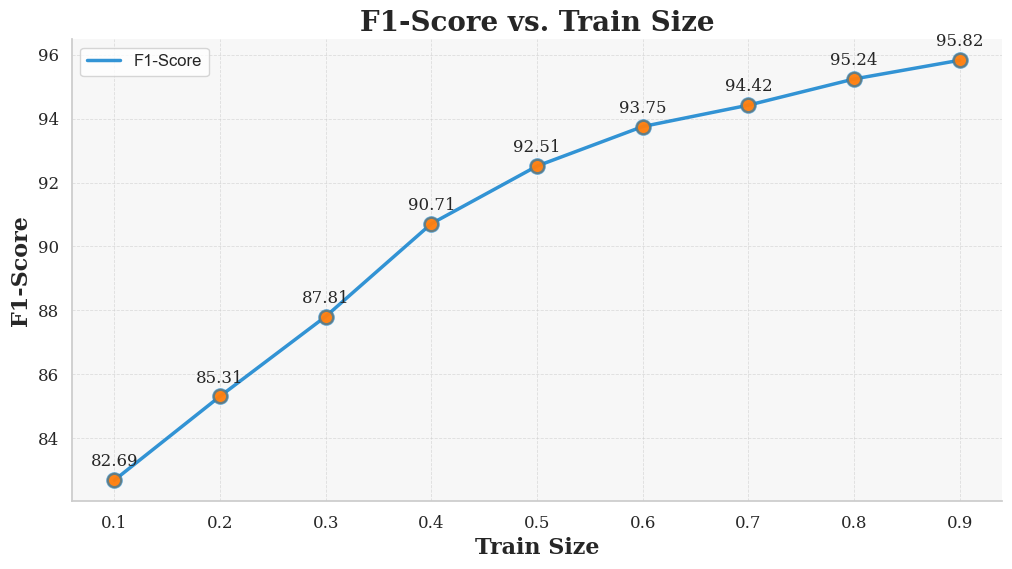

In [3]:
seed = 1694

train_sizes = np.linspace(0.1, 0.9, 9)
performances_rf = []
model_rf = None

for train_size in train_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=seed)
    
    rf = RandomForestClassifier(random_state=seed, n_estimators=95)
    model_rf = rf.fit(X_train, Y_train.values.ravel()) 
    
    pred = model_rf.predict(X_test)
    performance_rf = f1_score(Y_test, pred) * 100
    
    performances_rf.append(performance_rf)
    print(f"F1-Score for train size {train_size:.1f}: {performance_rf}%")

np.savetxt('8_rf.txt', performances_rf)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, performances_rf, linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('F1-Score', fontsize=16, fontweight='bold', family='serif')
plt.title('F1-Score vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(performances_rf):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], performances_rf[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['F1-Score'], fontsize=12)

sns.despine()

for i, txt in enumerate(performances_rf):
    plt.plot(train_sizes[i], performances_rf[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], performances_rf[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

F1-Score for train size 0.1: 79.23510664378524%
F1-Score for train size 0.2: 82.57887517146777%
F1-Score for train size 0.3: 85.17571884984025%
F1-Score for train size 0.4: 87.0648589226823%
F1-Score for train size 0.5: 89.02600264433671%
F1-Score for train size 0.6: 90.85903083700441%
F1-Score for train size 0.7: 91.55555555555556%
F1-Score for train size 0.8: 93.00776914539401%
F1-Score for train size 0.9: 92.74725274725274%


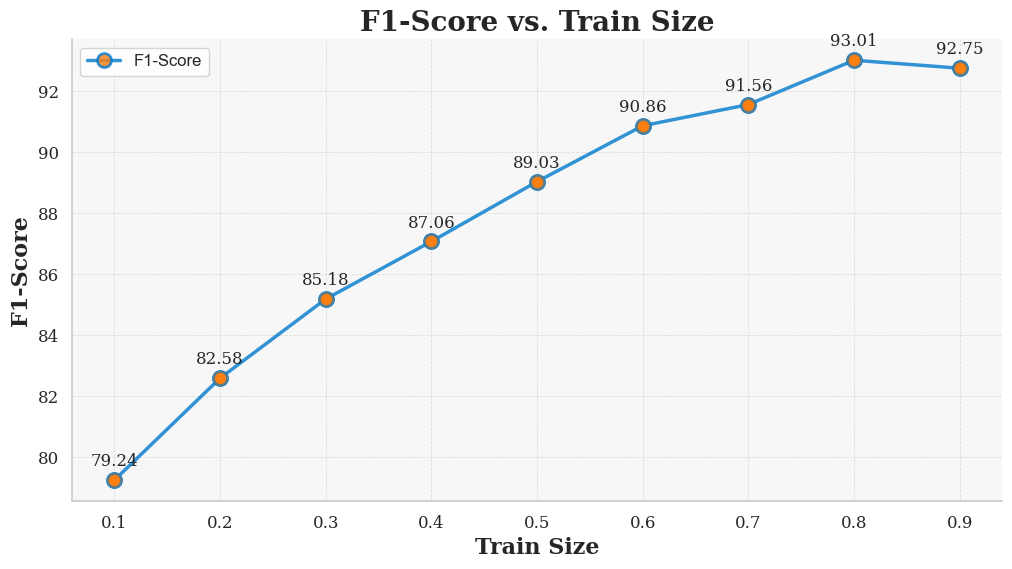

In [4]:
train_sizes = np.linspace(0.1, 0.9, 9)
performances_pca = []

for i, train_size in enumerate(train_sizes):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=983)
   
    pca = PCA(n_components=9)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    rf_pca = RandomForestClassifier(random_state=983, n_estimators=91)
    rf_pca.fit(X_train_pca, Y_train.values.ravel())
    
    pred_pca = rf_pca.predict(X_test_pca)
    performance_pca = f1_score(Y_test, pred_pca) * 100

    performances_pca.append(performance_pca)
    print(f"F1-Score for train size {train_size:.1f}: {performance_pca}%")

np.savetxt('8_rf_pca.txt', performances_pca)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, performances_pca, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('F1-Score', fontsize=16, fontweight='bold', family='serif')
plt.title('F1-Score vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(performances_pca):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], performances_pca[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['F1-Score'], fontsize=12)

sns.despine()

for i, txt in enumerate(performances_pca):
    plt.plot(train_sizes[i], performances_pca[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], performances_pca[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

F1-Score for train size 0.1: 83.22116500348109%
F1-Score for train size 0.2: 85.00135611608354%
F1-Score for train size 0.3: 88.07631160572336%
F1-Score for train size 0.4: 90.54103790945896%
F1-Score for train size 0.5: 92.55039439088519%
F1-Score for train size 0.6: 93.61702127659575%
F1-Score for train size 0.7: 94.37869822485207%
F1-Score for train size 0.8: 95.83802024746907%
F1-Score for train size 0.9: 95.96412556053812%


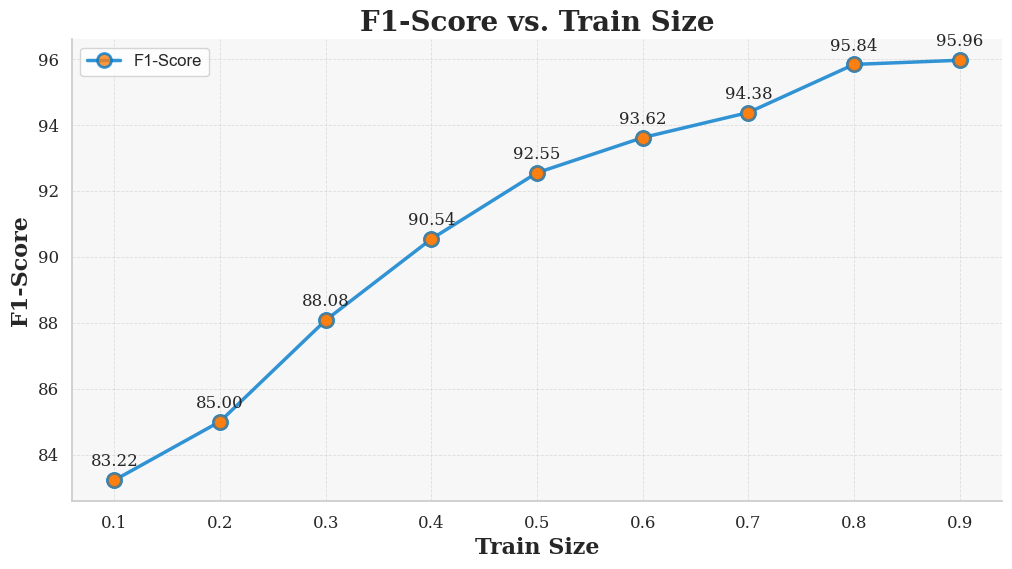

In [5]:
train_sizes = np.linspace(0.1, 0.9, 9)
performances_isolation = []

for i, train_size in enumerate(train_sizes):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=train_size, random_state=1341)

    clf = IsolationForest(n_estimators=26, contamination=0.01, random_state=530, max_samples=105)
    outliers = clf.fit_predict(X_train)
    X_train = X_train[outliers == 1]
    Y_train = Y_train[outliers == 1]

    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    X_train_selected = X_train.drop(to_drop, axis=1)
    X_test_selected = X_test.drop(to_drop, axis=1)

    rf_isolation = RandomForestClassifier(n_estimators=63, random_state=530, criterion='gini')
    rf_isolation.fit(X_train_selected, Y_train.values.ravel())

    Y_pred = rf_isolation.predict(X_test_selected)
    performance_isolation = f1_score(Y_test, Y_pred) * 100

    performances_isolation.append(performance_isolation)
    print(f"F1-Score for train size {train_size:.1f}: {performance_isolation}%")

np.savetxt('8_rf_isolation.txt', performances_isolation)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, performances_isolation, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('F1-Score', fontsize=16, fontweight='bold', family='serif')
plt.title('F1-Score vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(performances_isolation):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], performances_isolation[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['F1-Score'], fontsize=12)

sns.despine()

for i, txt in enumerate(performances_isolation):
    plt.plot(train_sizes[i], performances_isolation[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], performances_isolation[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1-Score for train size 0.1: 74.30249632892804%


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1-Score for train size 0.2: 79.5343800757986%


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1-Score for train size 0.3: 79.55696202531645%


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1-Score for train size 0.4: 81.9756726870623%


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1-Score for train size 0.5: 83.94618834080717%


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1-Score for train size 0.6: 85.9090909090909%


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1-Score for train size 0.7: 87.5%


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
F1-Score for train size 0.8: 87.96296296296296%


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
F1-Score for train size 0.9: 89.90825688073394%


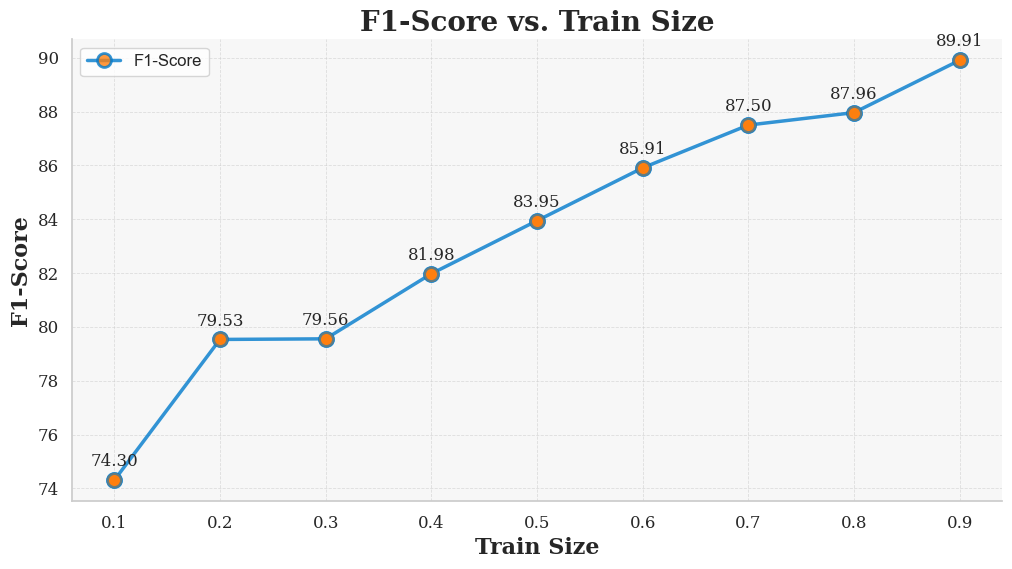

In [6]:
performances_lstm = []
seed = 47

for i in range(1, 10):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=i * 0.1, random_state=seed)

    X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(11, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.01 * 5))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=1/15)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['f1_score'])

    model.fit(X_train_reshaped, Y_train, epochs=107, batch_size=10000, verbose=0)

    X_train_features = model.predict(X_train_reshaped)
    X_test_features = model.predict(X_test_reshaped)

    rf_lstm = RandomForestClassifier(n_estimators=47, random_state=seed)
    rf_lstm.fit(X_train_features, Y_train.values.ravel())

    Y_pred = rf_lstm.predict(X_test_features)
    performance_lstm = f1_score(Y_test, Y_pred)  * 100

    performances_lstm.append(performance_lstm)
    print(f"F1-Score for train size {0.1 * i:.1f}: {performance_lstm}%")

np.savetxt('8_rf_lstm.txt', performances_lstm)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, performances_lstm, marker='o', linestyle='-', linewidth=2.5, markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.8)

plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('F1-Score', fontsize=16, fontweight='bold', family='serif')
plt.title('F1-Score vs. Train Size', fontsize=20, fontweight='bold', family='serif')

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.gca().set_facecolor('#f7f7f7')

for i, txt in enumerate(performances_lstm):
    plt.annotate(f"{txt:.2f}", (train_sizes[i], performances_lstm[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, family='serif')

plt.xticks(fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')

plt.legend(['F1-Score'], fontsize=12)

sns.despine()

for i, txt in enumerate(performances_lstm):
    plt.plot(train_sizes[i], performances_lstm[i], marker='o', markersize=10, color='#ff7f0e', alpha=0.9)
    plt.plot(train_sizes[i], performances_lstm[i], marker='o', markersize=10, color='#007acc', markerfacecolor='#ff7f0e', markeredgewidth=2, markeredgecolor='#007acc', alpha=0.6)

plt.show()

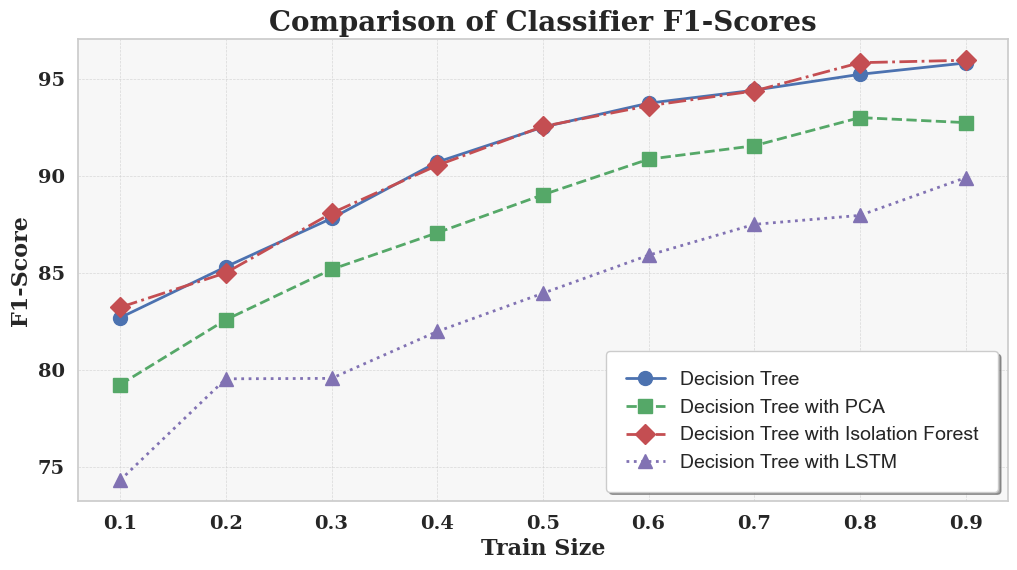

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

plt.plot(train_sizes, performances_rf, marker='o', label='Decision Tree', linestyle='-', color='b', markersize=10, linewidth=2)
plt.plot(train_sizes, performances_pca, marker='s', label='Decision Tree with PCA', linestyle='--', color='g', markersize=10, linewidth=2)
plt.plot(train_sizes, performances_isolation, marker='D', label='Decision Tree with Isolation Forest', linestyle='-.', color='r', markersize=10, linewidth=2)
plt.plot(train_sizes, performances_lstm, marker='^', label='Decision Tree with LSTM', linestyle=':', color='m', markersize=10, linewidth=2)

plt.title('Comparison of Classifier F1-Scores', size=20, fontweight='bold', family='serif')
plt.xlabel('Train Size', fontsize=16, fontweight='bold', family='serif')
plt.ylabel('F1-Score', fontsize=16, fontweight='bold', family='serif')
plt.xticks(fontsize=14, fontweight='bold', family='serif')
plt.yticks(fontsize=14, fontweight='bold', family='serif')
plt.legend(loc='best', fontsize=14, frameon=True, fancybox=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#f7f7f7')
plt.show()

In [8]:
joblib.dump(model_rf, '8_RF_Model.joblib')
joblib.dump(rf_pca, '8_RF_PCA_Model.joblib')
joblib.dump(rf_isolation, '8_RF_Isolation_Model.joblib')
joblib.dump(rf_lstm, '8_RF_LSTM_Model.joblib')

['8_RF_LSTM_Model.joblib']